In [159]:
# This mounts your Google Drive to the Colab VM.
from google.colab import drive
drive.mount('/content/drive')

# TODO: Enter the foldername in your Drive where you have saved the unzipped
# assignment folder, e.g. 'cs231n/assignments/assignment1/'
FOLDERNAME = 'Colab Notebooks/assignments'
assert FOLDERNAME is not None, "[!] Enter the foldername."

# Now that we've mounted your Drive, this ensures that
# the Python interpreter of the Colab VM can load
# python files from within it.
import sys
sys.path.append('/content/drive/My Drive/{}'.format(FOLDERNAME))

%cd /content/drive/My\ Drive/$FOLDERNAME

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab Notebooks/assignments


In [160]:
!pwd

/content/drive/My Drive/Colab Notebooks/assignments


# Ames Housing Dataset - Regrese

Notebook se venuje linearni regresi na datasetu prodeje domu v meste Ames. Pro nase ucely postaci prilozeny zjednoduseny datset.

Par zdroju na uvod:
- [Cely dataset](https://jse.amstat.org/v19n3/decock/AmesHousing.txt)
- [Feature description](https://jse.amstat.org/v19n3/decock/DataDocumentation.txt)
- [Clanek](https://jse.amstat.org/v19n3/decock.pdf)


Nacteni knihoven:

In [161]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Nacteni zjednoduseneho datasetu z csv souboru

In [162]:
df = pd.read_csv('ames_simple.csv', index_col=0)

Spravne bychom si na novem datasetu meli udelat tzv. Exploratory Data Analysis (EDA), tj. prozkoumat data. My si data jen zevrubne popiseme, ale lze najit spoustu zajimavych prikladu - napr [zde](https://www.kaggle.com/code/sanidhyajadaun/housing-price-prediction-using-linear-regression/notebook) na podobnem datasetu nebo [tady](https://www.kaggle.com/code/harrywang/housing-price-prediction/notebook) na California Housing datasetu.

Vypiseme si prvnich a poslednich 5 radku v tabulce

In [163]:
df.head()

,basement_sf,living_area_sf,price
0,1080.0,1656,215.0
1,882.0,896,105.0
2,1329.0,1329,172.0
3,2110.0,2110,244.0
4,928.0,1629,189.9


In [164]:
df.tail()

,basement_sf,living_area_sf,price
2869,1003.0,1003,142.5
2870,864.0,902,131.0
2871,912.0,970,132.0
2872,1389.0,1389,170.0
2873,996.0,2000,188.0


In [165]:
len(df.index)

2874

Dataset obsahuje celkem 2874 zazmamu pro 3 featury:
- ``'basement_sf'``: plocha sklepa domu ve ctverecnich stopach (puvodni nazev ``'Total Bsmt SF'``)
- ``'living_area_sf'``: nadzemni obytna plocha ve ctverecnich stopach (puvodni nazev ``'Gr Liv Area'``)
- ``'price'``: cena za kterou se dum prodal v tisicich dolarech (puvodni nazev ``'SalePrice'``)

Zjevne zavislosti nam demonstruji scatterploty nize

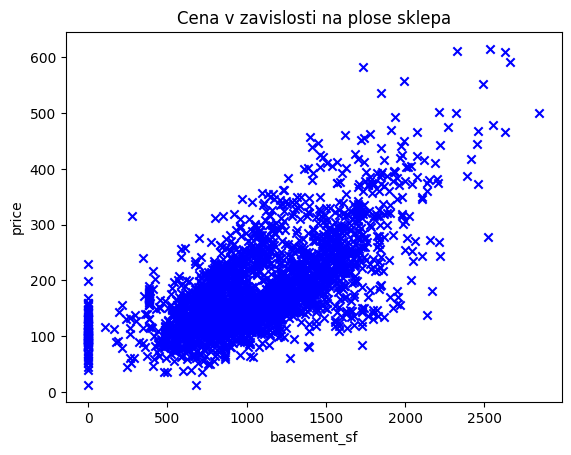

In [166]:
plt.scatter(df.basement_sf, df.price, marker='x', c='b')
plt.title('Cena v zavislosti na plose sklepa')
plt.xlabel('basement_sf')
plt.ylabel('price')
plt.show()

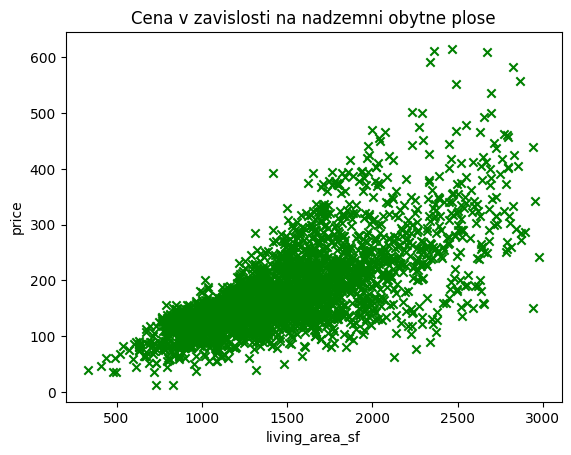

In [167]:
plt.scatter(df.living_area_sf, df.price, marker='x', c='g')
plt.title('Cena v zavislosti na nadzemni obytne plose')
plt.xlabel('living_area_sf')
plt.ylabel('price')
plt.show()

Data si rozdelime na trenovaci a testovaci mnozinu a vlozime do prihodne nazvanych promennych.

In [168]:

X = df[['basement_sf', 'living_area_sf']].iloc[:-10,:].to_numpy()
y = df.price.iloc[:-10].values

# pripadne jinak zapsano
# X = df[['basement_sf', 'living_area_sf']].head(-10).to_numpy()
# y = df.price.head(-10).values

X.shape, y.shape

((2864, 2), (2864,))

In [169]:
X_test = df[['basement_sf', 'living_area_sf']].iloc[-10:,:].to_numpy()
y_test = df.price.iloc[-10:].values

X_test.shape, y_test.shape

((10, 2), (10,))

## Vypocteme presne reseni

Presne reseni je mozne ziskat pomoci vztahu:

$$\boldsymbol{\Theta = (\tilde{X}^T\tilde{X})^{-1}\tilde{X}^Ty}$$

kde $\tilde{X}$ je matice X doplnena o sloupec samych 1

In [170]:
X_tilde = np.concatenate([np.ones([X.shape[0], 1]), X], axis=1)
X_tilde

array([[1.000e+00, 1.080e+03, 1.656e+03],
       [1.000e+00, 8.820e+02, 8.960e+02],
       [1.000e+00, 1.329e+03, 1.329e+03],
       ...,
       [1.000e+00, 5.460e+02, 1.092e+03],
       [1.000e+00, 5.460e+02, 1.092e+03],
       [1.000e+00, 5.460e+02, 1.092e+03]])

In [171]:
X.shape, X_tilde.shape

((2864, 2), (2864, 3))

Pozor na rozmery pri maticovem nasobeni. Ruzni autori muzou brat napr $\Theta$ jako sloupcovy vektor a jini jako radkovy. Podobne muzou byt prohozeny rozmery i v pripade $X$ nebo $y$.

Stejne tak je treba si dat pozor na nasobeni - z knihovny numpy by se vam mohli hodit metody matmul a dot.

In [172]:
def reg_analytical(X_tilde, y):
      '''
      Vypocet analytickeho reseni lin. regrese

      X_tilde - matice X doplnena o sloupec samych 1
      y - vektor spravnych vystupu

      Vraci vektor thet [theta0, theta1, theta2]
      '''

      thetas = np.zeros(X_tilde.shape[1])

      # TODO: Doplnte kod pro vypocet analytickeho reseni
      # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
      thetas = np.dot(np.matmul(np.linalg.inv(np.matmul( X_tilde.transpose(), X_tilde)),X_tilde.transpose()),y)

      # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

      return thetas


In [173]:
reg_analytical(X_tilde, y)

array([-36.26875351,   0.08269191,   0.08711688])

V praxi si reseni muzeme vypocist napr. pomoci knihovny [sklearn.linear_model.LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score) (vnitrne vyuziva `scipy.linalg`). Muzeme si tak zkontrolovat vypocet z predchoziho kroku.

In [174]:
from sklearn.linear_model import LinearRegression

reg_sklearn = LinearRegression().fit(X, y)

thetas = np.concatenate([[reg_sklearn.intercept_], reg_sklearn.coef_]) # pro pouziti dale
thetas

array([-36.26875351,   0.08269191,   0.08711688])

Vyhodou teto knihovny  je, ze na rovnou vypocita [koeficient determinence](https://cs.wikipedia.org/wiki/Koeficient_determinace) $R^2$, ktery urcuje kvalitu regresniho modelu.

In [175]:
reg_sklearn.score(X, y)

0.6718152786433088

$R^2=0.672$ tedy model neni nijak moc dobry (perfektni model by mel skore 1).

## Test predikce

Otestujeme predikci na testovacim datasetu. V tabulce nize vidime skutecnou cenu domu, cenu domu predikovanou pomoci naseho modelu (pouzivame analyticky vypoctene $\Theta$) a jejich rozdil.

In [176]:
pred_sklearn = reg_sklearn.predict(X_test)
pred_sklearn = np.floor(pred_sklearn*10)/10 # zaokrouhleni na jedno desetine misto

df_sklearn = pd.DataFrame({
    'price': y_test,
    'predicted_price': pred_sklearn,
    'difference': (pred_sklearn - y_test),
    'difference_percent': np.floor(((pred_sklearn - y_test) / y_test) * 100)
})

df_sklearn.head(10)

,price,predicted_price,difference,difference_percent
0,71.0,104.0,33.0,46.0
1,150.9,257.1,106.2,70.0
2,188.0,257.1,69.1,36.0
3,160.0,154.9,-5.1,-4.0
4,131.0,171.5,40.5,30.0
5,142.5,134.0,-8.5,-6.0
6,131.0,113.7,-17.3,-14.0
7,132.0,123.6,-8.4,-7.0
8,170.0,199.5,29.5,17.0
9,188.0,220.3,32.3,17.0


## Chybova funkce

Model je dan funkci $\hat{y}$ a chyba modelu je $J(\Theta)$:

$$\hat{y} = \Theta_0 + \Theta_1 x_1^{(i)} + \Theta_2 x_2^{(i)}$$

$$J(\Theta) = \frac{1}{2} \sum_{i=1}^{n}(y_i - \hat{y}_i)^2 = \frac{1}{2}  \sum_{i=1}^{n}(y_i - \Theta_0 - \Theta_1 x_1^{(i)} - \Theta_2 x_2^{(i)})^2$$

kde:
- $x_1^{(i)}$ je feature $x_1$ (napr basement_sf) pro $i$-ty vzorek
- $x_2^{(i)}$ je feature $x_2$ (napr living_area_sf) pro $i$-ty vzorek

In [177]:
def loss_sum(theta0, theta1, theta2, X, y):
    '''
    Vypocet hodnoty chybove funkce s pomoci sumy

    Vraci hodnotu chyby.
    '''

    loss = 0
    # TODO: Doplnte kod pro vypocet hodnoty chybove funkce
    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    for i in range(0,len(y)):
      loss += np.power((y[i] - theta0 - theta1* X[i,0] - theta2*X[i,1]),2)
    loss /= 2

    # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    return loss



Chyba analytickeho reseni

In [178]:
loss_sum(thetas[0], thetas[1], thetas[2], X, y)

2724742.586464901

Root Mean Squred Error (RMSE) nam napovi, jak moc velka je prumerna chyba v puvodnich jednotkach (chyba je totiz v dolarech na druhou).

In [179]:
np.sqrt(2*loss_sum(thetas[0], thetas[1], thetas[2], X, y)) / len(y) # 2* ptz chybova funkce obsahuje 1/2

0.8150884216263594

### Cenova funkce - vektorizovana

Model je dan funkci $\hat{y}$ a chyba modelu je $J(\Theta)$:

$$\hat{y} = \Theta_0 x_0^{(i)} + \Theta_1 x_1^{(i)} + \Theta_2 x_2^{(i)} = \tilde{X} \Theta$$

$$J(\Theta) = \frac{1}{2} \sum_{i=1}^{n}(y_i - \hat{y}_i)^2$$

kde
- $x_0^{(i)}$ , tj koeficient $x_0$ pro $i$-ty vzorek, je vzdy 1

In [180]:
def loss_vec(thetas, X_tilde, y):
    '''
    Vektorizovany vypocet hodnoty chybove funkce

    thetas - vektor thet [theta0,theta1,theta2,...]
    X_tilde - matice X se sloupcem samych 1
    y - vystupni hodnota

    Vraci hodnotu chyby.
    '''
    ycaret = np.matmul(X_tilde, thetas)
    loss = 0

    # TODO: Doplnte kod pro vypocet hodnoty chybove funkce
    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    for i in range(0,len(y)):
      loss+=np.power(y[i]-ycaret[i], 2)
    loss/=2
    # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    return loss

Vypocteme chybu analytickeho reseni

In [181]:
loss_vec(thetas, X_tilde, y)

2724742.586464902

Rozdil chyb

In [182]:
np.abs(loss_vec(thetas, X_tilde, y) - loss_sum(thetas[0], thetas[1], thetas[2], X, y))

9.313225746154785e-10

### Srovnani rychlosti vypoctu

Spustime 100 opakovani vzpoctu chyby. Vektorizovany vypocet je i na malych datech nasobne rychlejsi.

In [183]:
%%time
for i in range(100):
    loss_sum(thetas[0], thetas[1], thetas[2], X, y)

CPU times: user 1.33 s, sys: 3.31 ms, total: 1.33 s
Wall time: 1.43 s


In [184]:
%%time
for i in range(100):
    loss_vec(thetas, X_tilde, y)

CPU times: user 1.16 s, sys: 0 ns, total: 1.16 s
Wall time: 1.2 s


## Gradient Descent

Pro nalezeni $\Theta$ muzeme pouzit i metodu nejvetsiho spadu. Jedna se o iteracni algoritmus, kdy se po jednolivych krocich "vylepsuje" honota parametru modelu $\Theta$. Kazdy krok je dan jako:

$$\Theta = \Theta - \alpha \frac{\partial}{\partial \Theta} J(\Theta)$$

Nas model je dan funkci $\hat{y}$ a chyba modelu je $J(\Theta)$:

$$\hat{y}_i = \Theta_0 x_0^{(i)} + \Theta_1 x_1^{(i)} + \Theta_2 x_2^{(i)} = \tilde{X} \Theta$$

$$J(\Theta) = \frac{1}{2} \sum_{i=1}^{n}(y_i - \hat{y}_i)^2 = \frac{1}{2} \sum_{i=1}^{n}(y_i - \boldsymbol{\tilde{x}}^{(i)} \Theta)^2$$

Pro metodu nejvetsiho spadu potrebujeme derivaci chybove funkce (navic idealne ve forme maticoveho nasobeni kvuli vektorizaci vypoctu):

$$\frac{\partial}{\partial \Theta} J(\Theta) = -\sum_{i=1}^{n}(y_i - \Theta^T \boldsymbol{\tilde{x}}^{(i)})\boldsymbol{\tilde{x}}^{(i)} = -\tilde{X}^T (\boldsymbol{y} - \tilde{X}\Theta^T) = \tilde{X}^T (\tilde{X}\Theta^T - \boldsymbol{y})$$

Dosadime a dostaneme:

\begin{align*}
\boldsymbol{\Theta} &= \boldsymbol{\Theta} - \alpha \frac{\partial}{\partial \boldsymbol{\Theta}} J(\boldsymbol{\Theta}) \\
\boldsymbol{\Theta} &= \boldsymbol{\Theta} - \alpha \boldsymbol{\tilde{X}}^T (\boldsymbol{\tilde{X}} \boldsymbol{\Theta}^T - \boldsymbol{y})  \\
\end{align*}

In [185]:
def reg_gradient_descent(X_tilde, y, epochs=100, alpha=1e-3, print_every=10):
    '''
    Vektorizovany vypocet gradientu.

    X_tilde - MAtice X rozsirena o sloupec jednicek,
    y - Vektor obsahujici spravne vystupy
    epochs - pocet iteraci vypoctu
    alpha - learningrate,
    print_every=10
    '''

    # inicializujeme thety na same 0
    thetas = np.zeros(X_tilde.shape[1])

    print('Velikost chyby po %d epochach: %f' % (0, loss_vec(thetas, X_tilde, y)))

    for i in range(epochs):

        # TODO: Doplnte kod pro vypocet jedne iterace gradientu
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

        thetas = thetas - alpha * np.matmul(X_tilde.transpose(),np.matmul(X_tilde,thetas.transpose())-y)


        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

        if (i+1) % print_every == 0:
            # print(thetas)
            print('Velikost chyby po %d epochach: %f' % (i+1, loss_vec(thetas, X_tilde, y)))

    return thetas

thetas_gd = reg_gradient_descent(X_tilde, y, epochs=100, alpha=1e-10, print_every=5)


Velikost chyby po 0 epochach: 54305960.058656
Velikost chyby po 5 epochach: 2907538.761641
Velikost chyby po 10 epochach: 2896485.072390
Velikost chyby po 15 epochach: 2888532.944709
Velikost chyby po 20 epochach: 2882812.107038
Velikost chyby po 25 epochach: 2878696.478549
Velikost chyby po 30 epochach: 2875735.651322
Velikost chyby po 35 epochach: 2873605.598032
Velikost chyby po 40 epochach: 2872073.210643
Velikost chyby po 45 epochach: 2870970.789231
Velikost chyby po 50 epochach: 2870177.689034
Velikost chyby po 55 epochach: 2869607.117173
Velikost chyby po 60 epochach: 2869196.634106
Velikost chyby po 65 epochach: 2868901.320292
Velikost chyby po 70 epochach: 2868688.860228
Velikost chyby po 75 epochach: 2868536.005861
Velikost chyby po 80 epochach: 2868426.032344
Velikost chyby po 85 epochach: 2868346.907680
Velikost chyby po 90 epochach: 2868289.975944
Velikost chyby po 95 epochach: 2868249.009992
Velikost chyby po 100 epochach: 2868219.529962


In [186]:
# Vypiseme si naucene thety
thetas_gd

array([-2.84919518e-05,  7.23983051e-02,  7.17688079e-02])

In [187]:
loss_vec(thetas, X_tilde, y), loss_vec(thetas_gd, X_tilde, y)

(2724742.586464902, 2868219.5299616884)

In [188]:
# pro informaci - rozdil mezi nejlepsi chybou a chybou z GD
np.abs(loss_vec(thetas, X_tilde, y) - loss_vec(thetas_gd, X_tilde, y))

143476.94349678652

### Srovnani na testovacich datech

In [189]:
X_test_tilde = np.concatenate([np.ones([X_test.shape[0], 1]), X_test], axis=1) # do testovaci matice pridam sloupec 1

In [190]:
pred_gd = np.dot(X_test_tilde, thetas_gd)
pred_gd = np.floor(pred_gd*10)/10 # zaokrouhleni na jedno desetine misto

pred_sklearn = reg_sklearn.predict(X_test)
pred_sklearn = np.floor(pred_sklearn*10)/10 # zaokrouhleni na jedno desetine misto

df_compare = pd.DataFrame({
    'price': y_test,
    'predicted_price_sklearn': pred_sklearn,
    'difference_sklearn': (pred_sklearn - y_test),
    'predicted_price_gd': pred_gd,
    'difference_gd': (pred_gd - y_test),
})

df_compare.head(10)

,price,predicted_price_sklearn,difference_sklearn,predicted_price_gd,difference_gd
0,71.0,104.0,33.0,117.9,46.9
1,150.9,257.1,106.2,249.1,98.2
2,188.0,257.1,69.1,249.1,61.1
3,160.0,154.9,-5.1,162.3,2.3
4,131.0,171.5,40.5,176.4,45.4
5,142.5,134.0,-8.5,144.5,2.0
6,131.0,113.7,-17.3,127.2,-3.8
7,132.0,123.6,-8.4,135.6,3.6
8,170.0,199.5,29.5,200.2,30.2
9,188.0,220.3,32.3,215.6,27.6


Pro srovnani si testovaci body zobrazime do grafu

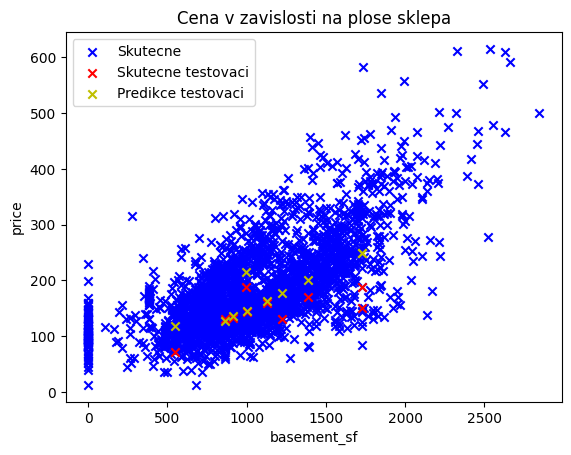

In [191]:
plt.scatter(df.basement_sf, df.price, marker='x', c='b', label='Skutecne')
plt.scatter(X_test[:,0], y_test, marker='x', c='r', label='Skutecne testovaci')
plt.scatter(X_test[:,0], df_compare.predicted_price_gd.values, marker='x', c='y', label='Predikce testovaci')
plt.title('Cena v zavislosti na plose sklepa')
plt.xlabel('basement_sf')
plt.ylabel('price')
plt.legend()
plt.show()

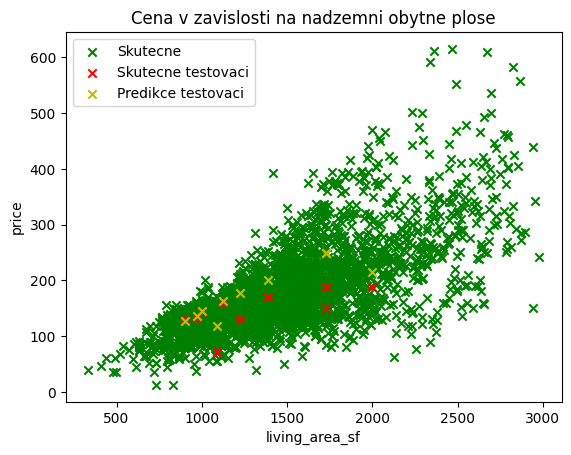

In [192]:
plt.scatter(df.living_area_sf, df.price, marker='x', c='g', label='Skutecne')
plt.scatter(X_test[:,1], y_test, marker='x', c='r', label='Skutecne testovaci')
plt.scatter(X_test[:,1], df_compare.predicted_price_gd.values, marker='x', c='y', label='Predikce testovaci')
plt.title('Cena v zavislosti na nadzemni obytne plose')
plt.xlabel('living_area_sf')
plt.ylabel('price')
plt.legend()
plt.show()